# Gerrymadering & Polarization Study

- Author: Simon Lee (simonlee711@g.ucla.edu)

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import glob

plt.style.use('ggplot')

#### DW Nominate Score Analysis

What is Nominate Score (Source Wikipedia):

---

<em>NOMINATE (an acronym for Nominal Three-Step Estimation) is a multidimensional scaling application developed by US political scientists Keith T. Poole and Howard Rosenthal in the early 1980s to analyze preferential and choice data, such as legislative roll-call voting behavior.[1][2] In its most well-known application, members of the US Congress are placed on a two-dimensional map, with politicians who are ideologically similar (i.e. who often vote the same) being close together. One of these two dimensions corresponds to the familiar left–right political spectrum (liberal–conservative in the United States).

As computing capabilities grew, Poole and Rosenthal developed multiple iterations of their NOMINATE procedure: the original D-NOMINATE method, W-NOMINATE, and most recently DW-NOMINATE (for dynamic, weighted NOMINATE). In 2009, Poole and Rosenthal were the first recipients of the Society for Political Methodology's Best Statistical Software Award for their development of NOMINATE.[3] In 2016, the society awarded Poole its Career Achievement Award, stating that "the modern study of the U.S. Congress would be simply unthinkable without NOMINATE legislative roll call voting scores."[4]</em>

In [190]:
# reads in data and gets specific congress and also filters out presidents data 
nominate_score = pd.read_csv('../data/nominate_scores.csv')
print("Before Preprocessing")
display(nominate_score)
nominate_score = nominate_score[nominate_score['chamber'] == 'House'] 
nominate_score = nominate_score[nominate_score['congress'] > 110]
nominate_score = nominate_score[nominate_score['congress'] < 117]

# convert party_code from 200 -> Republican, 100 -> Deomcrat, rest reamins
nominate_score['party_code'] = nominate_score['party_code'].replace([200, 100, 328],
                        ['Republican', 'Democratic', 'Other'])

# reorganize dataframe
nominate_score = nominate_score[['congress', 'chamber', 'district_code', 'state_abbrev', 'party_code', 'bioname', 'nominate_dim1', 'nominate_dim2']]

# Making a start date & end date column. Definitely not the most efficient way to do it but whatever..
conditions = [
    (nominate_score['congress'] == 111),
    (nominate_score['congress'] == 112),
    (nominate_score['congress'] == 113),
    (nominate_score['congress'] == 114),
    (nominate_score['congress'] == 115),
    (nominate_score['congress'] == 116),
    (nominate_score['congress'] == 117)
]
start_values = [2009,2011,2013,2015,2017,2019,2021]
values = [2010,2012,2014,2016,2018,2020,2022]
end_values = [2011,2013,2015,2017,2019,2021,2023]

nominate_score['start_year'] = np.select(conditions, start_values)
nominate_score['year'] = np.select(conditions, values)
nominate_score['end_year'] = np.select(conditions, end_values)

# remove others
nominate_score = nominate_score[~nominate_score['party_code'].isin(['Other'])]

# final dataframe
print("After Preprocessing")
nominate_score

Before Preprocessing


,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
0,1,President,99869,99,0.0,USA,5000,NaN,NaN,"WASHINGTON, George",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,House,379,44,2.0,GA,4000,0.0,1.0,"BALDWIN, Abraham",...,1807.0,-0.165,-0.373,-28.55029,0.75800,103.0,12.0,NaN,-0.429,-0.817
2,1,House,4854,44,1.0,GA,4000,0.0,1.0,"JACKSON, James",...,1806.0,-0.320,-0.181,-24.89986,0.77600,98.0,9.0,NaN,-0.559,-0.052
3,1,House,6071,44,3.0,GA,4000,0.0,1.0,"MATHEWS, George",...,1812.0,-0.428,-0.317,-12.62728,0.88000,99.0,2.0,NaN,-0.413,-0.232
4,1,House,1538,52,6.0,MD,5000,0.0,1.0,"CARROLL, Daniel",...,1796.0,0.116,-0.740,-23.47008,0.78300,96.0,11.0,NaN,0.114,-0.779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50480,118,Senate,40915,56,0.0,WV,100,NaN,NaN,"MANCHIN, Joe, III",...,NaN,-0.060,0.409,-15.58810,0.81886,78.0,7.0,NaN,-0.134,0.424
50481,118,Senate,29940,25,0.0,WI,100,NaN,NaN,"BALDWIN, Tammy",...,NaN,-0.493,-0.134,-4.87620,0.94014,79.0,3.0,NaN,-0.599,0.253
50482,118,Senate,41111,25,0.0,WI,200,NaN,NaN,"JOHNSON, Ron",...,NaN,0.626,-0.148,-9.20443,0.89002,79.0,3.0,NaN,0.656,0.377
50483,118,Senate,20953,68,0.0,WY,200,NaN,NaN,"LUMMIS, Cynthia M.",...,NaN,0.692,-0.353,-10.45930,0.87451,78.0,5.0,NaN,0.943,-0.300


After Preprocessing


,congress,chamber,district_code,state_abbrev,party_code,bioname,nominate_dim1,nominate_dim2,start_year,year,end_year
46070,111,House,1.0,AL,Republican,"BONNER, Jr., Josiah Robins (Jo)",0.367,0.513,2009,2010,2011
46071,111,House,3.0,AL,Republican,"ROGERS, Mike Dennis",0.362,0.462,2009,2010,2011
46072,111,House,7.0,AL,Democratic,"DAVIS, Artur",-0.270,0.454,2009,2010,2011
46073,111,House,2.0,AL,Democratic,"BRIGHT, Bobby Neal, Sr.",0.067,0.671,2009,2010,2011
46074,111,House,5.0,AL,Democratic,"GRIFFITH, Parker",-0.045,0.522,2009,2010,2011
...,...,...,...,...,...,...,...,...,...,...,...
49278,116,House,8.0,WI,Republican,"GALLAGHER, Michael",0.428,0.007,2019,2020,2021
49279,116,House,1.0,WI,Republican,"STEIL, Bryan",0.413,0.045,2019,2020,2021
49280,116,House,7.0,WI,Republican,"TIFFANY, Thomas P.",0.643,-0.206,2019,2020,2021
49281,116,House,3.0,WI,Democratic,"KIND, Ron",-0.260,-0.080,2019,2020,2021


In [191]:
nominate_score = nominate_score.reset_index()
nominate_score = nominate_score.drop("index",axis=1)
nominate_score

,congress,chamber,district_code,state_abbrev,party_code,bioname,nominate_dim1,nominate_dim2,start_year,year,end_year
0,111,House,1.0,AL,Republican,"BONNER, Jr., Josiah Robins (Jo)",0.367,0.513,2009,2010,2011
1,111,House,3.0,AL,Republican,"ROGERS, Mike Dennis",0.362,0.462,2009,2010,2011
2,111,House,7.0,AL,Democratic,"DAVIS, Artur",-0.270,0.454,2009,2010,2011
3,111,House,2.0,AL,Democratic,"BRIGHT, Bobby Neal, Sr.",0.067,0.671,2009,2010,2011
4,111,House,5.0,AL,Democratic,"GRIFFITH, Parker",-0.045,0.522,2009,2010,2011
...,...,...,...,...,...,...,...,...,...,...,...
2676,116,House,8.0,WI,Republican,"GALLAGHER, Michael",0.428,0.007,2019,2020,2021
2677,116,House,1.0,WI,Republican,"STEIL, Bryan",0.413,0.045,2019,2020,2021
2678,116,House,7.0,WI,Republican,"TIFFANY, Thomas P.",0.643,-0.206,2019,2020,2021
2679,116,House,3.0,WI,Democratic,"KIND, Ron",-0.260,-0.080,2019,2020,2021


In [192]:
nominate_score = nominate_score.rename(columns={"district_code": "District", "year": "Year", "state_abbrev": "State"})

In [193]:
n_df = nominate_score.set_index(['District', 'Year', 'State'])
n_df

,,,congress,chamber,party_code,bioname,nominate_dim1,nominate_dim2,start_year,end_year
District,Year,State,,,,,,,,
1.0,2010,AL,111,House,Republican,"BONNER, Jr., Josiah Robins (Jo)",0.367,0.513,2009,2011
3.0,2010,AL,111,House,Republican,"ROGERS, Mike Dennis",0.362,0.462,2009,2011
7.0,2010,AL,111,House,Democratic,"DAVIS, Artur",-0.270,0.454,2009,2011
2.0,2010,AL,111,House,Democratic,"BRIGHT, Bobby Neal, Sr.",0.067,0.671,2009,2011
5.0,2010,AL,111,House,Democratic,"GRIFFITH, Parker",-0.045,0.522,2009,2011
...,...,...,...,...,...,...,...,...,...,...
8.0,2020,WI,116,House,Republican,"GALLAGHER, Michael",0.428,0.007,2019,2021
1.0,2020,WI,116,House,Republican,"STEIL, Bryan",0.413,0.045,2019,2021
7.0,2020,WI,116,House,Republican,"TIFFANY, Thomas P.",0.643,-0.206,2019,2021


#### What do the dimensions mean

Below I have copied a snippet from Wikipedia about the Nominate Score Dimensions and what they mean:

---

<em>Poole and Rosenthal demonstrate that—despite the many complexities of congressional representation and politics—roll call voting in both the House and the Senate can be organized and explained by no more than two dimensions throughout the sweep of American history. The first dimension (horizontal or x-axis) is the familiar left-right (or liberal-conservative) spectrum on economic matters. The second dimension (vertical or y-axis) picks up attitudes on cross-cutting, salient issues of the day (which include or have included slavery, bimetallism, civil rights, regional, and social/lifestyle issues). Rosenthal and Poole have initially argued that the first dimension refers to socio-economic matters and the second dimension to race-relations.[10] However, the often confusing and residual nature of the second dimension has led to the second dimension being largely ignored by other researchers.[11]

For the most part, congressional voting is uni-dimensional, with most of the variation in voting patterns explained by placement along the liberal-conservative first dimension. While the first dimension of the DW-NOMINATE score is able to predict results at 83% accuracy, the addition of the second dimension only increases accuracy to 85%.[10] Furthermore, the second dimension only provided a significant increase in accuracy for Congresses 1-99. As late as the 1990s, the second dimension was able to measure partisan splits in abortion and gun rights issues. However, a 2017 analysis found that since 1987, the votes of the US Congress had best fit a one-dimensional model, suggesting increasing party polarization after 1987.[12]</em>

---

Takeaway: You can ignore dimension 2

Text(0, 0.5, 'race-relations ideology')

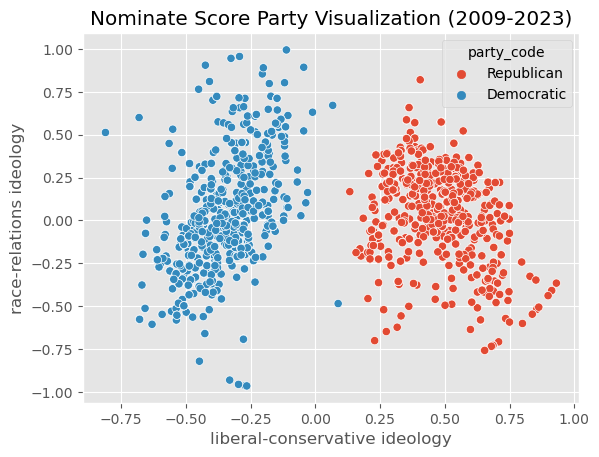

In [194]:
sns.scatterplot(data=nominate_score, x="nominate_dim1", y="nominate_dim2", hue='party_code')
plt.title("Nominate Score Party Visualization (2009-2023)")
plt.xlabel("liberal-conservative ideology")
plt.ylabel("race-relations ideology")

<strong>Fig 1.</strong> Tries to show if there are any outliers or politicians that have opposing views And while we do have a few data points, we can clearly identify two distinct clusrers for deomcrats and republicans aligning with their viewpoints. However the variation among the clusters are spread out indicating that some states are subject to polarisation.

<AxesSubplot:xlabel='congress', ylabel='nominate_dim1'>

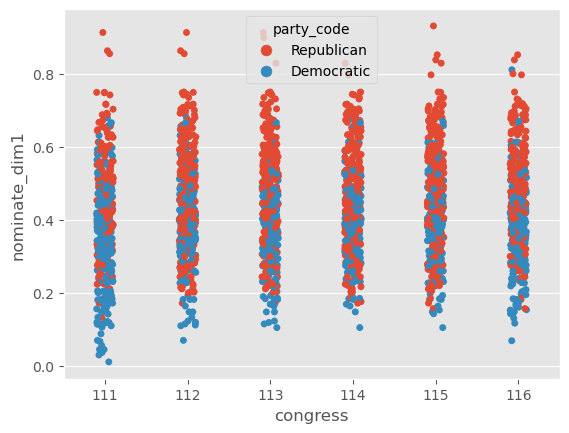

In [195]:
nominate_score['nominate_dim1'] = nominate_score['nominate_dim1'].abs()
sns.stripplot(data =nominate_score, x = 'congress', y='nominate_dim1', hue='party_code')

<AxesSubplot:xlabel='congress', ylabel='nominate_dim1'>

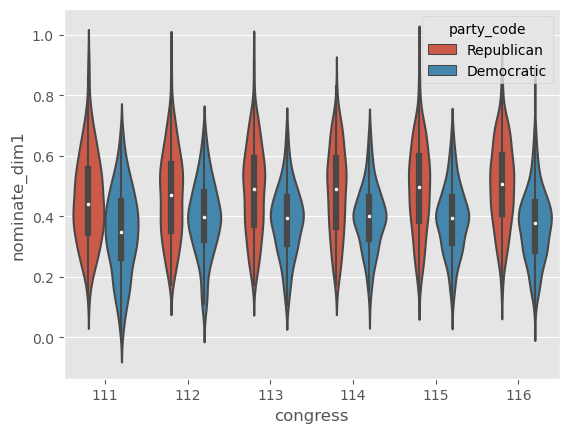

In [196]:
sns.violinplot(data =nominate_score, x = 'congress', y='nominate_dim1', hue='party_code')

#### Efficiency Gap

In [197]:
# use glob to get all the csv files 
# in the folder
path = "../data/"
csv_files = glob.glob(os.path.join(path, "*_election.csv"))
  
  
concat_df = pd.DataFrame()
# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f)
      
    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
      
    # print the content
    print('Content:')

    df = df.replace(',','', regex=True)
    df['Republican'] = df['Republican'].astype(int)
    df['Democratic'] = df['Democratic'].astype(int)
    display(df)

    concat_df = pd.concat([concat_df, df])
    print()

Location: ../data/2018_election.csv
File Name: ../data/2018_election.csv
Content:


,Unnamed: 0,District,Democratic,Republican,Year,State
0,0,1st,89226,153228,2018,AL
1,1,2d,86931,138879,2018,AL
2,2,3d,83996,147770,2018,AL
3,3,4th,46492,184255,2018,AL
4,4,5th,101388,159063,2018,AL
...,...,...,...,...,...,...
430,504,5th,138385,225619,2018,WI
431,505,6th,144536,180311,2018,WI
432,506,7th,124307,194061,2018,WI
433,507,8th,119265,209410,2018,WI



Location: ../data/2014_election.csv
File Name: ../data/2014_election.csv
Content:


,Unnamed: 0,District,Republican,Democratic,Year,State
0,0,1st,103758,48278,2014,AL
1,1,2nd,113103,54692,2014,AL
2,2,3rd,103558,52816,2014,AL
3,3,4th,132831,0,2014,AL
4,4,5th,115338,0,2014,AL
...,...,...,...,...,...,...
429,505,5th,231160,101190,2014,WI
430,506,6th,169767,122212,2014,WI
431,507,7th,169891,112949,2014,WI
432,508,8th,188553,101345,2014,WI



Location: ../data/2012_election.csv
File Name: ../data/2012_election.csv
Content:


,Unnamed: 0,District,Republican,Democratic,Year,State
0,0,1st,196374,0,2012,AL
1,1,2d,180591,103092,2012,AL
2,2,3d,175306,98141,2012,AL
3,3,4th,199071,69706,2012,AL
4,4,5th,189185,101772,2012,AL
...,...,...,...,...,...,...
430,551,5th,250335,118478,2012,WI
431,552,6th,223460,135921,2012,WI
432,553,7th,201720,157524,2012,WI
433,554,8th,198874,156287,2012,WI



Location: ../data/2010_election.csv
File Name: ../data/2010_election.csv
Content:


,Unnamed: 0,District,Republican,Democratic,Year,State
0,0,1,121655,95503,2010,NH
1,1,2,108610,105060,2010,NH
2,0,1,65558,99387,2010,IN
3,1,2,88803,91341,2010,IN
4,2,3,116140,61267,2010,IN
...,...,...,...,...,...,...
430,4,5,177235,101146,2010,WA
431,5,6,109800,151873,2010,WA
432,6,7,0,232649,2010,WA
433,7,8,161296,148581,2010,WA



Location: ../data/2020_election.csv
File Name: ../data/2020_election.csv
Content:


,Unnamed: 0,District,Democratic,Republican,Year,State
0,0,1st,116949,211825,2020,AL
1,1,2d,105286,197996,2020,AL
2,2,3d,104595,217384,2020,AL
3,3,4th,56237,261553,2020,AL
4,4,5th,0,253094,2020,AL
...,...,...,...,...,...,...
429,553,5th,175902,265434,2020,WI
430,554,6th,164239,238874,2020,WI
431,555,7th,162741,252048,2020,WI
432,556,8th,149558,268173,2020,WI



Location: ../data/2016_election.csv
File Name: ../data/2016_election.csv
Content:


,Unnamed: 0,District,Republican,Democratic,Year,State
0,0,1st,208083,0,2016,AL
1,1,2d,134886,112089,2016,AL
2,2,3d,192164,94549,2016,AL
3,3,4th,235925,0,2016,AL
4,4,5th,205647,102234,2016,AL
...,...,...,...,...,...,...
430,553,5th,260706,114477,2016,WI
431,554,6th,204147,133072,2016,WI
432,555,7th,223418,138643,2016,WI
433,556,8th,227892,135682,2016,WI


In [198]:
#concat_df =  concat_df.drop("Unnamed: 0",axis=1)
concat_df['total'] = concat_df['Democratic'] + concat_df['Republican']
concat_df['Majority'] = concat_df['total']//2 + 1
concat_df

,Unnamed: 0,District,Democratic,Republican,Year,State,total,Majority
0,0,1st,89226,153228,2018,AL,242454,121228
1,1,2d,86931,138879,2018,AL,225810,112906
2,2,3d,83996,147770,2018,AL,231766,115884
3,3,4th,46492,184255,2018,AL,230747,115374
4,4,5th,101388,159063,2018,AL,260451,130226
...,...,...,...,...,...,...,...,...
430,553,5th,114477,260706,2016,WI,375183,187592
431,554,6th,133072,204147,2016,WI,337219,168610
432,555,7th,138643,223418,2016,WI,362061,181031
433,556,8th,135682,227892,2016,WI,363574,181788


In [199]:
concat_df['District'] = concat_df['District'].str.replace('\D', '', regex=True)
concat_df = concat_df.drop("Unnamed: 0",axis=1)
df = df.replace(' ', np.nan)  
concat_df = concat_df.fillna(1)
concat_df =concat_df.astype({'District':'float'})
concat_df

,District,Democratic,Republican,Year,State,total,Majority
0,1.0,89226,153228,2018,AL,242454,121228
1,2.0,86931,138879,2018,AL,225810,112906
2,3.0,83996,147770,2018,AL,231766,115884
3,4.0,46492,184255,2018,AL,230747,115374
4,5.0,101388,159063,2018,AL,260451,130226
...,...,...,...,...,...,...,...
430,5.0,114477,260706,2016,WI,375183,187592
431,6.0,133072,204147,2016,WI,337219,168610
432,7.0,138643,223418,2016,WI,362061,181031
433,8.0,135682,227892,2016,WI,363574,181788


In [200]:
concat_df = concat_df.reset_index()
concat_df=concat_df.drop("index",axis=1)
concat_df

,District,Democratic,Republican,Year,State,total,Majority
0,1.0,89226,153228,2018,AL,242454,121228
1,2.0,86931,138879,2018,AL,225810,112906
2,3.0,83996,147770,2018,AL,231766,115884
3,4.0,46492,184255,2018,AL,230747,115374
4,5.0,101388,159063,2018,AL,260451,130226
...,...,...,...,...,...,...,...
2603,5.0,114477,260706,2016,WI,375183,187592
2604,6.0,133072,204147,2016,WI,337219,168610
2605,7.0,138643,223418,2016,WI,362061,181031
2606,8.0,135682,227892,2016,WI,363574,181788


In [201]:
concat_df['loser_wasted'] = 0
concat_df['winner_wasted'] = 0

df = concat_df
for i in df.index:
    if df['Democratic'][i] < df['Republican'][i]:
        df.at[i,'loser_wasted'] = df['Democratic'][i]
        df.at[i,'winner_wasted'] = abs(df['Republican'][i] - df['Majority'][i])
    elif df['Democratic'][i] > df['Republican'][i]:
        df.at[i,'loser_wasted'] =  abs(df['Democratic'][i]- df['Majority'][i])
        df.at[i,'winner_wasted'] = df['Republican'][i] 
    
#view the DataFrame
df

,District,Democratic,Republican,Year,State,total,Majority,loser_wasted,winner_wasted
0,1.0,89226,153228,2018,AL,242454,121228,89226,32000
1,2.0,86931,138879,2018,AL,225810,112906,86931,25973
2,3.0,83996,147770,2018,AL,231766,115884,83996,31886
3,4.0,46492,184255,2018,AL,230747,115374,46492,68881
4,5.0,101388,159063,2018,AL,260451,130226,101388,28837
...,...,...,...,...,...,...,...,...,...
2603,5.0,114477,260706,2016,WI,375183,187592,114477,73114
2604,6.0,133072,204147,2016,WI,337219,168610,133072,35537
2605,7.0,138643,223418,2016,WI,362061,181031,138643,42387
2606,8.0,135682,227892,2016,WI,363574,181788,135682,46104


In [202]:
# Calculates efficiency gap
df['efficiency gap'] = (abs(df['loser_wasted'] - df['winner_wasted']))/df['Majority']
df['state'] = df['State']
df['district'] = df['District'] 
df['year'] = df['Year']
df


,District,Democratic,Republican,Year,State,total,Majority,loser_wasted,winner_wasted,efficiency gap,state,district,year
0,1.0,89226,153228,2018,AL,242454,121228,89226,32000,0.472053,AL,1.0,2018
1,2.0,86931,138879,2018,AL,225810,112906,86931,25973,0.539900,AL,2.0,2018
2,3.0,83996,147770,2018,AL,231766,115884,83996,31886,0.449674,AL,3.0,2018
3,4.0,46492,184255,2018,AL,230747,115374,46492,68881,0.194056,AL,4.0,2018
4,5.0,101388,159063,2018,AL,260451,130226,101388,28837,0.557116,AL,5.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,5.0,114477,260706,2016,WI,375183,187592,114477,73114,0.220494,WI,5.0,2016
2604,6.0,133072,204147,2016,WI,337219,168610,133072,35537,0.578465,WI,6.0,2016
2605,7.0,138643,223418,2016,WI,362061,181031,138643,42387,0.531710,WI,7.0,2016
2606,8.0,135682,227892,2016,WI,363574,181788,135682,46104,0.492761,WI,8.0,2016


In [203]:
df = df.set_index(['District', 'Year', 'State'])
df

Democratic  Republican   total  Majority  loser_wasted  \
District Year State                                                           
1.0      2018 AL          89226      153228  242454    121228         89226   
2.0      2018 AL          86931      138879  225810    112906         86931   
3.0      2018 AL          83996      147770  231766    115884         83996   
4.0      2018 AL          46492      184255  230747    115374         46492   
5.0      2018 AL         101388      159063  260451    130226        101388   
...                         ...         ...     ...       ...           ...   
         2016 WI         114477      260706  375183    187592        114477   
6.0      2016 WI         133072      204147  337219    168610        133072   
7.0      2016 WI         138643      223418  362061    181031        138643   
8.0      2016 WI         135682      227892  363574    181788        135682   
1.0      2016 WY          75466      156176  231642    115822         75466   

                     winner_wasted  efficiency gap state  district  year  
District Year State                                                       
1.0      2018 AL             32000        0.472053    AL       1.0  2018  
2.0      2018 AL             25973        0.539900    AL       2.0  2018  
3.0      2018 AL             31886        0.449674    AL       3.0  2018  
4.0      2018 AL             68881        0.194056    AL       4.0  2018  
5.0      2018 AL             28837        0.557116    AL       5.0  2018  
...                            ...             ...   ...       ...   ...  
         2016 WI             73114        0.220494    WI       5.0  2016  
6.0      2016 WI             35537        0.578465    WI       6.0  2016  
7.0      2016 WI             42387        0.531710    WI       7.0  2016  
8.0      2016 WI             46104        0.492761    WI       8.0  2016  
1.0      2016 WY             40354        0.303155    WY       1.0  2016  

[2608 rows x 10 columns]

merge the two dataframes

In [204]:
mega_df = pd.merge(df, n_df, left_index=True, right_index=True)
mega_df

Democratic  Republican   total  Majority  loser_wasted  \
District Year State                                                           
1.0      2010 AK          77606      175384  252990    126496         77606   
              AL              0      129063  129063     64532             0   
              AR          78267       93224  171491     85746         78267   
              AZ          99233      112816  212049    106025         99233   
              CA         147307       72803  220110    110056         37251   
...                         ...         ...     ...       ...           ...   
53.0     2012 CA         164825      103482  268307    134154         30671   
         2014 CA          87104       60940  148044     74023         13081   
         2016 CA         198988       97968  296956    148479         50509   
         2018 CA         185667       83127  268794    134398         51269   
         2020 CA         334858           0  334858    167430        167428   

                     winner_wasted  efficiency gap state  district  year  \
District Year State                                                        
1.0      2010 AK             48888        0.227027    AK       1.0  2010   
              AL             64531        0.999985    AL       1.0  2010   
              AR              7478        0.825566    AR       1.0  2010   
              AZ              6791        0.871889    AZ       1.0  2010   
              CA             72803        0.323036    CA       1.0  2010   
...                            ...             ...   ...       ...   ...   
53.0     2012 CA            103482        0.542742    CA      53.0  2012   
         2014 CA             60940        0.646542    CA      53.0  2014   
         2016 CA             97968        0.319634    CA      53.0  2016   
         2018 CA             83127        0.237042    CA      53.0  2018   
         2020 CA                 0        0.999988    CA      53.0  2020   

                     congress chamber  party_code  \
District Year State                                 
1.0      2010 AK          111   House  Republican   
              AL          111   House  Republican   
              AR          111   House  Democratic   
              AZ          111   House  Democratic   
              CA          111   House  Democratic   
...                       ...     ...         ...   
53.0     2012 CA          112   House  Democratic   
         2014 CA          113   House  Democratic   
         2016 CA          114   House  Democratic   
         2018 CA          115   House  Democratic   
         2020 CA          116   House  Democratic   

                                             bioname  nominate_dim1  \
District Year State                                                   
1.0      2010 AK                 YOUNG, Donald Edwin          0.283   
              AL     BONNER, Jr., Josiah Robins (Jo)          0.367   
              AR                BERRY, Robert Marion         -0.293   
              AZ                    KIRKPATRICK, Ann         -0.169   
              CA                   THOMPSON, Michael         -0.393   
...                                              ...            ...   
53.0     2012 CA                     DAVIS, Susan A.         -0.343   
         2014 CA                     DAVIS, Susan A.         -0.343   
         2016 CA                     DAVIS, Susan A.         -0.343   
         2018 CA                     DAVIS, Susan A.         -0.343   
         2020 CA                     DAVIS, Susan A.         -0.343   

                     nominate_dim2  start_year  end_year  
District Year State                                       
1.0      2010 AK             0.022        2009      2011  
              AL             0.513        2009      2011  
              AR             0.956        2009      2011  
              AZ            -0.010        2009      2011  
              CA             0.067  

In [205]:
mega_df.describe()

,Democratic,Republican,total,Majority,loser_wasted,winner_wasted,efficiency gap,district,year,congress,nominate_dim1,nominate_dim2,start_year,end_year
count,2634.000000,2.634000e+03,2.634000e+03,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2633.000000,2633.000000,2634.000000,2634.000000
mean,123431.496203,1.260481e+05,2.494796e+05,124740.542901,67814.301443,56924.735004,inf,10.181853,2015.005315,113.502658,0.066947,0.010021,2014.005315,2016.005315
std,68326.191513,7.431567e+04,9.211610e+04,46058.042914,47796.191455,45659.997922,NaN,10.574423,3.424733,1.712367,0.449915,0.282189,3.424733,3.424733
min,0.000000,-1.000000e+00,-1.000000e+00,0.000000,0.000000,-1.000000,0.000000,1.000000,2010.000000,111.000000,-0.811000,-0.964000,2009.000000,2011.000000
25%,78871.750000,7.640900e+04,1.877142e+05,93858.000000,28447.500000,24671.000000,0.280178,3.000000,2012.000000,112.000000,-0.381000,-0.183000,2011.000000,2013.000000
50%,116765.000000,1.271590e+05,2.497685e+05,124885.000000,64701.000000,46915.500000,0.537317,6.000000,2016.000000,114.000000,0.224000,0.012000,2015.000000,2017.000000
75%,166404.000000,1.756732e+05,3.116268e+05,155814.000000,101749.250000,82216.000000,0.825393,13.000000,2018.000000,115.000000,0.491000,0.208000,2017.000000,2019.000000
max,387109.000000,1.635151e+06,1.635151e+06,817576.000000,262340.000000,817575.000000,inf,53.000000,2020.000000,116.000000,0.931000,0.994000,2019.000000,2021.000000


In [206]:
temp = mega_df
temp = temp.reset_index()
temp

,District,Year,State,Democratic,Republican,total,Majority,loser_wasted,winner_wasted,efficiency gap,...,district,year,congress,chamber,party_code,bioname,nominate_dim1,nominate_dim2,start_year,end_year
0,1.0,2010,AK,77606,175384,252990,126496,77606,48888,0.227027,...,1.0,2010,111,House,Republican,"YOUNG, Donald Edwin",0.283,0.022,2009,2011
1,1.0,2010,AL,0,129063,129063,64532,0,64531,0.999985,...,1.0,2010,111,House,Republican,"BONNER, Jr., Josiah Robins (Jo)",0.367,0.513,2009,2011
2,1.0,2010,AR,78267,93224,171491,85746,78267,7478,0.825566,...,1.0,2010,111,House,Democratic,"BERRY, Robert Marion",-0.293,0.956,2009,2011
3,1.0,2010,AZ,99233,112816,212049,106025,99233,6791,0.871889,...,1.0,2010,111,House,Democratic,"KIRKPATRICK, Ann",-0.169,-0.010,2009,2011
4,1.0,2010,CA,147307,72803,220110,110056,37251,72803,0.323036,...,1.0,2010,111,House,Democratic,"THOMPSON, Michael",-0.393,0.067,2009,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,53.0,2012,CA,164825,103482,268307,134154,30671,103482,0.542742,...,53.0,2012,112,House,Democratic,"DAVIS, Susan A.",-0.343,-0.103,2011,2013
2630,53.0,2014,CA,87104,60940,148044,74023,13081,60940,0.646542,...,53.0,2014,113,House,Democratic,"DAVIS, Susan A.",-0.343,-0.103,2013,2015
2631,53.0,2016,CA,198988,97968,296956,148479,50509,97968,0.319634,...,53.0,2016,114,House,Democratic,"DAVIS, Susan A.",-0.343,-0.103,2015,2017
2632,53.0,2018,CA,185667,83127,268794,134398,51269,83127,0.237042,...,53.0,2018,115,House,Democratic,"DAVIS, Susan A.",-0.343,-0.103,2017,2019


In [207]:
district_num = temp.groupby(['State'])['District'].max().astype(int).to_list()

In [208]:
# loop through states and year. Make new dataframe and do the efficiency gap but for state totals like seen on Wikipedia
# Ask Camilla for clarification on which one she wanrs


all_res = []

for year in temp.Year.unique():
    for state in temp.State.unique():
        df = temp[(temp['State']==state) & (temp['Year']==year)]
        df['efficiency gap state'] = (abs(df['loser_wasted'].sum() - df['winner_wasted'].sum()))/df['Majority'].sum()
        all_res.append(df)
mega_df2 = pd.concat(all_res)
mega_df2


/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_27025/154293989.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['efficiency gap state'] = (abs(df['loser_wasted'].sum() - df['winner_wasted'].sum()))/df['Majority'].sum()
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_27025/154293989.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['efficiency gap state'] = (abs(df['loser_wasted'].sum() - df['winner_wasted'].sum()))/df['Majority'].sum()
/var/folders/q3/z0pdr58n4bn46rs6tvs5

,District,Year,State,Democratic,Republican,total,Majority,loser_wasted,winner_wasted,efficiency gap,...,year,congress,chamber,party_code,bioname,nominate_dim1,nominate_dim2,start_year,end_year,efficiency gap state
0,1.0,2010,AK,77606,175384,252990,126496,77606,48888,0.227027,...,2010,111,House,Republican,"YOUNG, Donald Edwin",0.283,0.022,2009,2011,0.227027
1,1.0,2010,AL,0,129063,129063,64532,0,64531,0.999985,...,2010,111,House,Republican,"BONNER, Jr., Josiah Robins (Jo)",0.367,0.513,2009,2011,0.076764
305,2.0,2010,AL,106865,111645,218510,109256,106865,2389,0.956250,...,2010,111,House,Democratic,"BRIGHT, Bobby Neal, Sr.",0.067,0.671,2009,2011,0.076764
564,3.0,2010,AL,80204,117736,197940,98971,80204,18765,0.620778,...,2010,111,House,Republican,"ROGERS, Mike Dennis",0.362,0.462,2009,2011,0.076764
793,4.0,2010,AL,0,167714,167714,83858,0,83856,0.999976,...,2010,111,House,Republican,"ADERHOLT, Robert",0.384,0.570,2009,2011,0.076764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,8.0,2020,WI,149558,268173,417731,208866,149558,59307,0.432100,...,2020,116,House,Republican,"GALLAGHER, Michael",0.428,0.007,2019,2021,0.267776
303,1.0,2020,WV,81177,180488,261665,130833,81177,49655,0.240933,...,2020,116,House,Republican,"McKINLEY, David",0.300,0.178,2019,2021,0.297495
563,2.0,2020,WV,100799,172195,272994,136498,100799,35697,0.476945,...,2020,116,House,Republican,"MOONEY, Alex X.",0.555,-0.196,2019,2021,0.297495
792,3.0,2020,WV,64927,161585,226512,113257,64927,48328,0.146560,...,2020,116,House,Republican,"MILLER, Carol",0.485,0.307,2019,2021,0.297495


In [209]:
mega_df2 = mega_df2.set_index(['District', 'Year', 'State'])
mega_df2

Democratic  Republican   total  Majority  loser_wasted  \
District Year State                                                           
1.0      2010 AK          77606      175384  252990    126496         77606   
              AL              0      129063  129063     64532             0   
2.0      2010 AL         106865      111645  218510    109256        106865   
3.0      2010 AL          80204      117736  197940     98971         80204   
4.0      2010 AL              0      167714  167714     83858             0   
...                         ...         ...     ...       ...           ...   
8.0      2020 WI         149558      268173  417731    208866        149558   
1.0      2020 WV          81177      180488  261665    130833         81177   
2.0      2020 WV         100799      172195  272994    136498        100799   
3.0      2020 WV          64927      161585  226512    113257         64927   
1.0      2020 WY          66576      185732  252308    126155         66576   

                     winner_wasted  efficiency gap state  district  year  \
District Year State                                                        
1.0      2010 AK             48888        0.227027    AK       1.0  2010   
              AL             64531        0.999985    AL       1.0  2010   
2.0      2010 AL              2389        0.956250    AL       2.0  2010   
3.0      2010 AL             18765        0.620778    AL       3.0  2010   
4.0      2010 AL             83856        0.999976    AL       4.0  2010   
...                            ...             ...   ...       ...   ...   
8.0      2020 WI             59307        0.432100    WI       8.0  2020   
1.0      2020 WV             49655        0.240933    WV       1.0  2020   
2.0      2020 WV             35697        0.476945    WV       2.0  2020   
3.0      2020 WV             48328        0.146560    WV       3.0  2020   
1.0      2020 WY             59577        0.055479    WY       1.0  2020   

                     congress chamber  party_code  \
District Year State                                 
1.0      2010 AK          111   House  Republican   
              AL          111   House  Republican   
2.0      2010 AL          111   House  Democratic   
3.0      2010 AL          111   House  Republican   
4.0      2010 AL          111   House  Republican   
...                       ...     ...         ...   
8.0      2020 WI          116   House  Republican   
1.0      2020 WV          116   House  Republican   
2.0      2020 WV          116   House  Republican   
3.0      2020 WV          116   House  Republican   
1.0      2020 WY          116   House  Republican   

                                             bioname  nominate_dim1  \
District Year State                                                   
1.0      2010 AK                 YOUNG, Donald Edwin          0.283   
              AL     BONNER, Jr., Josiah Robins (Jo)          0.367   
2.0      2010 AL             BRIGHT, Bobby Neal, Sr.          0.067   
3.0      2010 AL                 ROGERS, Mike Dennis          0.362   
4.0      2010 AL                    ADERHOLT, Robert          0.384   
...                                              ...            ...   
8.0      2020 WI                  GALLAGHER, Michael          0.428   
1.0      2020 WV                     McKINLEY, David          0.300   
2.0      2020 WV                     MOONEY, Alex X.          0.555   
3.0      2020 WV                       MILLER, Carol          0.485   
1.0      2020 WY                         CHENEY, Liz          0.405   

                     nominate_dim2  start_year  end_year  efficiency gap state  
District Year State                                                             
1.0      2010 AK             0.022        2009      2011              0.227027  
              AL             0.513        2009      2011              0.076764  
2.0      2010 AL             0.671        2009      2011          

In [210]:
mega_df2['nominate_dim1'] = mega_df2['nominate_dim1'].abs()
mega_df2.describe()

,Democratic,Republican,total,Majority,loser_wasted,winner_wasted,efficiency gap,district,year,congress,nominate_dim1,nominate_dim2,start_year,end_year,efficiency gap state
count,2634.000000,2.634000e+03,2.634000e+03,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2633.000000,2633.000000,2634.000000,2634.000000,2634.000000
mean,123431.496203,1.260481e+05,2.494796e+05,124740.542901,67814.301443,56924.735004,inf,10.181853,2015.005315,113.502658,0.431130,0.010021,2014.005315,2016.005315,0.219103
std,68326.191513,7.431567e+04,9.211610e+04,46058.042914,47796.191455,45659.997922,NaN,10.574423,3.424733,1.712367,0.144788,0.282189,3.424733,3.424733,0.193464
min,0.000000,-1.000000e+00,-1.000000e+00,0.000000,0.000000,-1.000000,0.000000,1.000000,2010.000000,111.000000,0.011000,-0.964000,2009.000000,2011.000000,0.001247
25%,78871.750000,7.640900e+04,1.877142e+05,93858.000000,28447.500000,24671.000000,0.280178,3.000000,2012.000000,112.000000,0.330000,-0.183000,2011.000000,2013.000000,0.062596
50%,116765.000000,1.271590e+05,2.497685e+05,124885.000000,64701.000000,46915.500000,0.537317,6.000000,2016.000000,114.000000,0.421000,0.012000,2015.000000,2017.000000,0.167052
75%,166404.000000,1.756732e+05,3.116268e+05,155814.000000,101749.250000,82216.000000,0.825393,13.000000,2018.000000,115.000000,0.530000,0.208000,2017.000000,2019.000000,0.318243
max,387109.000000,1.635151e+06,1.635151e+06,817576.000000,262340.000000,817575.000000,inf,53.000000,2020.000000,116.000000,0.931000,0.994000,2019.000000,2021.000000,0.999992


Text(0.5, 1.0, 'Boxplots of Efficiency Gap and Nominate Score Distribution')

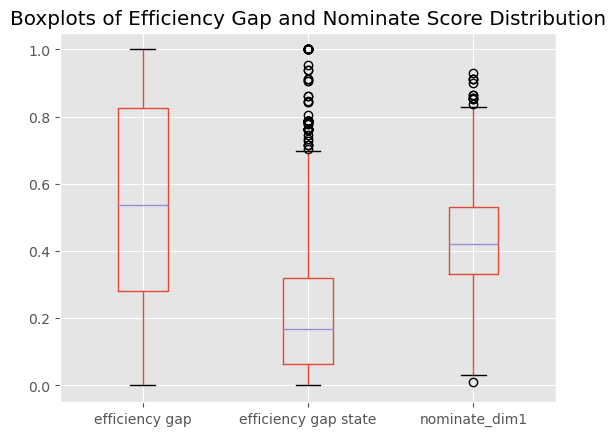

In [211]:
mega_df2.boxplot(column=[ 'efficiency gap', 'efficiency gap state', 'nominate_dim1']) 
plt.title("Boxplots of Efficiency Gap and Nominate Score Distribution")

In [ ]:
mega_df2.boxplot(column=[ 'efficiency gap', 'efficiency gap state', 'nominate_dim1']) 

<AxesSubplot:xlabel='year', ylabel='efficiency gap state'>

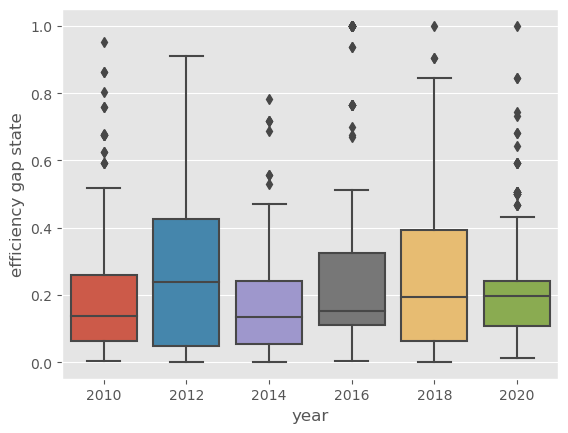

In [370]:
sns.boxplot(data=mega_df2, x="year", y="efficiency gap state")

<AxesSubplot:xlabel='year', ylabel='nominate_dim1'>

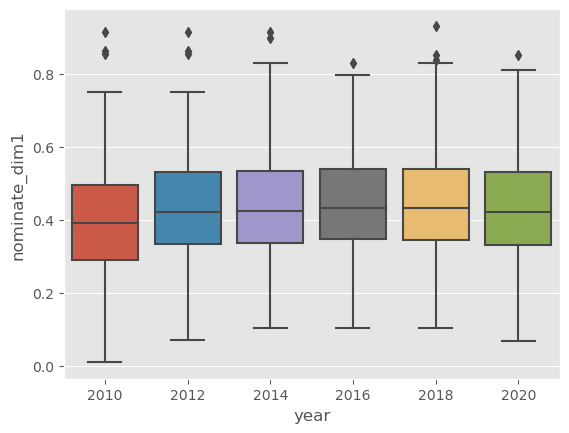

In [371]:
sns.boxplot(data=mega_df2, x="year", y="nominate_dim1")

In [386]:
# One hot encode dw nominate score and efficiency gap by thresholds and plot the results at a District, State and Country Level
# District is normal correlation plots, State is a bar graph counting positive and negative correlation, Country level is a heat map 
mega_df2['EG Thres: 0.08'] = np.where(mega_df2['efficiency gap state']>0.08, 1, 0)
mega_df2['DW Thres: 0.30'] = np.where(mega_df2['nominate_dim1']>0.3, 1, 0)
mega_df2['EG Thres: 0.15'] = np.where(mega_df2['efficiency gap state']>0.15, 1, 0)
mega_df2['DW Thres: 0.40'] = np.where(mega_df2['nominate_dim1']>0.4, 1, 0)
mega_df2['EG Thres: 0.20'] = np.where(mega_df2['efficiency gap state']>0.20, 1, 0)
mega_df2['DW Thres: 0.50'] = np.where(mega_df2['nominate_dim1']>0.5, 1, 0)
mega_df2['corr1'] = mega_df2['EG Thres: 0.08'] + mega_df2['DW Thres: 0.30']
mega_df2['corr2'] = mega_df2['EG Thres: 0.15'] + mega_df2['DW Thres: 0.40']
mega_df2['corr3'] = mega_df2['EG Thres: 0.20'] + mega_df2['DW Thres: 0.50']
mega_df2['corr4'] = mega_df2['EG Thres: 0.08'] + mega_df2['DW Thres: 0.40']


/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_27025/521170205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mega_df2['EG Thres: 0.08'] = np.where(mega_df2['efficiency gap state']>0.08, 1, 0)
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_27025/521170205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mega_df2['DW Thres: 0.30'] = np.where(mega_df2['nominate_dim1']>0.3, 1, 0)
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_27025/521170205.py:5: SettingWithCopyWarn

In [213]:
# the counts for the correlations
mega_df2['corr1'].value_counts()

2    1551
1     952
0     131
Name: corr1, dtype: int64

In [214]:
mega_df2

Democratic  Republican   total  Majority  loser_wasted  \
District Year State                                                           
1.0      2010 AK          77606      175384  252990    126496         77606   
              AL              0      129063  129063     64532             0   
2.0      2010 AL         106865      111645  218510    109256        106865   
3.0      2010 AL          80204      117736  197940     98971         80204   
4.0      2010 AL              0      167714  167714     83858             0   
...                         ...         ...     ...       ...           ...   
8.0      2020 WI         149558      268173  417731    208866        149558   
1.0      2020 WV          81177      180488  261665    130833         81177   
2.0      2020 WV         100799      172195  272994    136498        100799   
3.0      2020 WV          64927      161585  226512    113257         64927   
1.0      2020 WY          66576      185732  252308    126155         66576   

                     winner_wasted  efficiency gap state  district  year  ...  \
District Year State                                                       ...   
1.0      2010 AK             48888        0.227027    AK       1.0  2010  ...   
              AL             64531        0.999985    AL       1.0  2010  ...   
2.0      2010 AL              2389        0.956250    AL       2.0  2010  ...   
3.0      2010 AL             18765        0.620778    AL       3.0  2010  ...   
4.0      2010 AL             83856        0.999976    AL       4.0  2010  ...   
...                            ...             ...   ...       ...   ...  ...   
8.0      2020 WI             59307        0.432100    WI       8.0  2020  ...   
1.0      2020 WV             49655        0.240933    WV       1.0  2020  ...   
2.0      2020 WV             35697        0.476945    WV       2.0  2020  ...   
3.0      2020 WV             48328        0.146560    WV       3.0  2020  ...   
1.0      2020 WY             59577        0.055479    WY       1.0  2020  ...   

                     efficiency gap state EG Thres: 0.08 DW Thres: 0.30  \
District Year State                                                       
1.0      2010 AK                 0.227027              1              0   
              AL                 0.076764              0              1   
2.0      2010 AL                 0.076764              0              0   
3.0      2010 AL                 0.076764              0              1   
4.0      2010 AL                 0.076764              0              1   
...                                   ...            ...            ...   
8.0      2020 WI                 0.267776              1              1   
1.0      2020 WV                 0.297495              1              0   
2.0      2020 WV                 0.297495              1              1   
3.0      2020 WV                 0.297495              1              1   
1.0      2020 WY                 0.055479              0              1   

                    EG Thres: 0.15  DW Thres: 0.40  EG Thres: 0.20  \
District Year State                                                  
1.0      2010 AK                 1               0               1   
              AL                 0               0               0   
2.0      2010 AL                 0               0               0   
3.0      2010 AL                 0               0               0   
4.0      2010 AL                 0               0               0   
...                            ...             ...             ...   
8.0      2020 WI                 1               1               1   
1.0      2020 WV                 1               0               1   
2.0      2020 WV                 1               1               1   
3.0      2020 WV                 1               1               1   
1.0      2020 WY                 0               1               0   

                     DW Thres: 0.50  corr1  corr2  c

In [387]:
mega_df2['corr1'] = np.where((mega_df2['corr1']==2) | (mega_df2['corr1'] == 0), 1, 0)
mega_df2['corr2'] = np.where((mega_df2['corr2']==2) | (mega_df2['corr2'] == 0), 1, 0)
mega_df2['corr3'] = np.where((mega_df2['corr3']==2) | (mega_df2['corr3'] == 0), 1, 0)
mega_df2['corr4'] = np.where((mega_df2['corr4']==2) | (mega_df2['corr4'] == 0), 1, 0)
mega_df2

/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_27025/1846443803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mega_df2['corr1'] = np.where((mega_df2['corr1']==2) | (mega_df2['corr1'] == 0), 1, 0)
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_27025/1846443803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mega_df2['corr2'] = np.where((mega_df2['corr2']==2) | (mega_df2['corr2'] == 0), 1, 0)
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_27025/1846443803.py:3: Se

Democratic  Republican   total  Majority  loser_wasted  \
District Year State                                                           
1.0      2010 AK          77606      175384  252990    126496         77606   
              AL              0      129063  129063     64532             0   
2.0      2010 AL         106865      111645  218510    109256        106865   
3.0      2010 AL          80204      117736  197940     98971         80204   
4.0      2010 AL              0      167714  167714     83858             0   
...                         ...         ...     ...       ...           ...   
8.0      2020 WI         149558      268173  417731    208866        149558   
1.0      2020 WV          81177      180488  261665    130833         81177   
2.0      2020 WV         100799      172195  272994    136498        100799   
3.0      2020 WV          64927      161585  226512    113257         64927   
1.0      2020 WY          66576      185732  252308    126155         66576   

                     winner_wasted  efficiency gap state  district  year  ...  \
District Year State                                                       ...   
1.0      2010 AK             48888        0.227027    AK       1.0  2010  ...   
              AL             64531        0.999985    AL       1.0  2010  ...   
2.0      2010 AL              2389        0.956250    AL       2.0  2010  ...   
3.0      2010 AL             18765        0.620778    AL       3.0  2010  ...   
4.0      2010 AL             83856        0.999976    AL       4.0  2010  ...   
...                            ...             ...   ...       ...   ...  ...   
8.0      2020 WI             59307        0.432100    WI       8.0  2020  ...   
1.0      2020 WV             49655        0.240933    WV       1.0  2020  ...   
2.0      2020 WV             35697        0.476945    WV       2.0  2020  ...   
3.0      2020 WV             48328        0.146560    WV       3.0  2020  ...   
1.0      2020 WY             59577        0.055479    WY       1.0  2020  ...   

                     EG Thres: 0.08 DW Thres: 0.30 EG Thres: 0.15  \
District Year State                                                 
1.0      2010 AK                  1              0              1   
              AL                  0              1              0   
2.0      2010 AL                  0              0              0   
3.0      2010 AL                  0              1              0   
4.0      2010 AL                  0              1              0   
...                             ...            ...            ...   
8.0      2020 WI                  1              1              1   
1.0      2020 WV                  1              0              1   
2.0      2020 WV                  1              1              1   
3.0      2020 WV                  1              1              1   
1.0      2020 WY                  0              1              0   

                    DW Thres: 0.40  EG Thres: 0.20  DW Thres: 0.50  corr1  \
District Year State                                                         
1.0      2010 AK                 0               1               0      0   
              AL                 0               0               0      0   
2.0      2010 AL                 0               0               0      1   
3.0      2010 AL                 0               0               0      0   
4.0      2010 AL                 0               0               0      0   
...                            ...             ...             ...    ...   
8.0      2020 WI                 1               1               0      1   
1.0      2020 WV                 0               1               0      0   
2.0      2020 WV                 1               1               1      1   
3.0      2020 WV                 1               1               0      1   
1.0      2020 WY                 1               0               0      0   

                     corr2  corr3  corr

In [216]:
mega_df2['corr1'].value_counts()
mega_df2 = mega_df2.drop_duplicates()

In [217]:
mega_df.dtypes

Democratic          int64
Republican          int64
total               int64
Majority            int64
loser_wasted        int64
winner_wasted       int64
efficiency gap    float64
state              object
district          float64
year                int64
congress            int64
chamber            object
party_code         object
bioname            object
nominate_dim1     float64
nominate_dim2     float64
start_year          int64
end_year            int64
dtype: object

In [390]:
def timeseries(df):
    '''
    State for time series
    '''
    # turn state abbreviation into State
    state_info = pd.read_csv("../data/state_info.csv")
    state_dict = dict(zip(state_info.code, state_info.state))
    temp = df.replace({"state": state_dict})
    
    new_df = pd.DataFrame(columns = ["year", "count", "type"])
    counter=0
    for year in temp.year.unique():
        temp2 = temp[(temp['year'] == year)] 
        values = temp2.corr4.value_counts().to_list()
        new_df.loc[counter] =  [year, values[1], 'Negative']
        new_df.loc[counter+1] = [year, values[0], 'Positive']
        counter = counter+2

    sns.barplot(x = 'year', y = 'count', hue = 'type', data = new_df)
    plt.title("Time Series of Positive/Negative Correlation in USA")
    plt.xlabel("Years")
    plt.ylabel("Pos/Neg Counts")

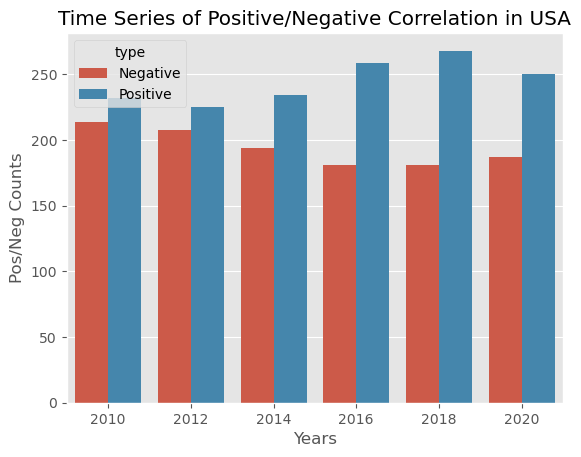

In [391]:
timeseries(mega_df2)

In [432]:
# make plots

def district(df, state, year, figsize=(16, 16)):
    '''
    State wide correlation plots at a district level for one year
    '''
    temp = df[(df['state'] == state)] 
    temp = temp[temp['year']==year] 
    
    # turn state abbreviation into State
    state_info = pd.read_csv("../data/state_info.csv")
    state_dict = dict(zip(state_info.code, state_info.state))
    temp = temp.replace({"state": state_dict})
    temp = temp.reset_index()
    # makes the dimensions size
    if len(temp) < 4:
        num_ncols = len(temp)
    else:
        num_ncols = 4

    num_nrows = (len(temp) - 1) // 6 + 1
    
    figsize = (figsize[0], figsize[0] * num_nrows / num_ncols)

    fig, axs = plt.subplots(num_nrows, num_ncols, figsize=figsize)
    fig.suptitle("Correlation of {} in the year {}".format(temp['state'].unique()[0], str(year)), fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=0.91, wspace=0.4, hspace=0.4)

    #axs.grid(b=False)
    ordered_names = temp.district
    ordered_names = ordered_names.astype(int)
    ordered_names = ordered_names.sort_values()

    for ax, district in zip(axs.flat, ordered_names):
        val = temp.loc[district-1,"corr1"]
        if val == 1:
            x = np.linspace(0,1,100)
            y = x
            ax.plot(x, y, '-b', label='y=2x+1')
            ax.set_title("Postive Correlation: District {}".format(str(district)))
            ax.set_xlabel("DW Nominate Score")
            ax.set_ylabel("Efficiency Gap Score")
            ax.xaxis.set_tick_params(labelbottom=False)
            ax.yaxis.set_tick_params(labelleft=False)
            # Hide X and Y axes tick marks
        else:
            x = np.linspace(-0,1,100)
            y = -x
            ax.plot(x, y, '-r', label='y=2x+1')
            ax.set_title("Negative Correlation: District {}".format(str(district)))
            ax.set_xlabel("DW Nominate Score")
            ax.set_ylabel("Efficiency Gap Score")
            ax.xaxis.set_tick_params(labelbottom=False)
            ax.yaxis.set_tick_params(labelleft=False)
            # Hide X and Y axes tick marks

def state(df, state):
    '''
    State for time series
    '''
    temp = df[(df['state'] == state)] 
    # # turn state abbreviation into State
    # state_info = pd.read_csv("../data/state_info.csv")
    # state_dict = dict(zip(state_info.code, state_info.state))
    # temp = temp.replace({"state": state_dict})
    
    # new_df = pd.DataFrame(columns = ["year", "count", "type"])
    # counter=0
    # for year in temp.year.unique():
    #     temp2 = temp[(temp['year'] == year)] 
    #     values = temp2.corr1.value_counts().to_list()
    #     new_df.loc[counter] =  [year, values[1], 'Negative']
    #     new_df.loc[counter+1] = [year, values[0], 'Positive']
    #     counter = counter+2

    # sns.barplot(x = 'year', y = 'count', hue = 'type', data = new_df)
    # plt.title("Time Series of Positive/Negative Correlation in {}".format(temp.state.unique()[0]))
    # plt.xlabel("Years")
    # plt.ylabel("Pos/Neg Counts")
    state_info = pd.read_csv("../data/state_info.csv")
    state_dict = dict(zip(state_info.code, state_info.state))
    temp = temp.replace({"state": state_dict})
    
    new_df = pd.DataFrame(columns = ["state", "year", "count", "type"])
    counter=0
    for state in temp.district.unique():
        temp2 = temp[(temp['district'] == state)] 
        for year in temp.year.unique():
            temp3 = temp2[(temp2['year'] == year)] 
            values = temp3.corr1.value_counts().to_list()
            print (values.index)
            if len(values) == 0:
                new_df.loc[counter] = ["District "+str(int(state)), year, 0, 'Positive']
                new_df.loc[counter+1] =  ["District "+str(int(state)), year, 0, 'Negative']
            if len(values) == 1:
                new_df.loc[counter] = ["District "+str(int(state)), year, values[0]/len(temp3.corr1), 'Positive']
                new_df.loc[counter+1] =  ["District "+str(int(state)), year, values[1]/len(temp), 'Negative']
            counter = counter+2
            
    pos = new_df[(new_df['type'] == 'Positive')]
    neg = new_df[(new_df['type'] == 'Negative')] 

    pos = pos.pivot("state", "year", "count")
    neg = neg.pivot("state", "year", "count")
    plt.figure(figsize=(6, 12))    
    sns.heatmap(pos, annot=True,cmap="Blues")
    plt.title("Time Series of Positive Correlation between\nefficiency gap and DW-Nominate score in the USA")
    plt.xlabel("Years")
    plt.ylabel("District")
    plt.show()

    plt.figure(figsize=(6, 12))
    sns.heatmap(neg, annot=True)
    plt.title("Time Series of Negative Correlation between\nefficiency gap and DW-Nominate score in the USA")
    plt.xlabel("Years")
    plt.ylabel("District")
    plt.show() 
    

def country(df):
    '''
    Heat map
    '''
    state_info = pd.read_csv("../data/state_info.csv")
    state_dict = dict(zip(state_info.code, state_info.state))
    temp = df.replace({"state": state_dict})
    
    new_df = pd.DataFrame(columns = ["state", "year", "count", "type"])
    counter=0
    for state in temp.state.unique():
        temp2 = temp[(temp['state'] == state)] 
        for year in temp.year.unique():
            temp3 = temp2[(temp2['year'] == year)] 
            values = temp3.corr1.value_counts().to_list()
            if len(values) == 0:
                new_df.loc[counter] = [state, year, 0, 'Positive']
                new_df.loc[counter+1] =  [state, year, 0, 'Negative']
            if len(values) == 1:
                new_df.loc[counter] = [state, year, values[0]/len(temp3.corr1), 'Positive']
                new_df.loc[counter+1] =  [state, year, 0, 'Negative']
            if len(values) >1:
                new_df.loc[counter] = [state, year, values[0]/len(temp3.corr1), 'Positive']
                new_df.loc[counter+1] =  [state, year, values[1]/len(temp3.corr1), 'Negative']
            counter = counter+2
            

    pos = new_df[(new_df['type'] == 'Positive')]
    neg = new_df[(new_df['type'] == 'Negative')] 

    pos = pos.pivot("state", "year", "count")
    neg = neg.pivot("state", "year", "count")
    
    plt.figure(figsize=(6, 12))
    sns.heatmap(pos, annot=True,cmap="Blues")
    plt.title("Time Series of Positive Correlation between\nefficiency gap and DW-Nominate score in the USA")
    plt.xlabel("Years")
    plt.ylabel("State")
    plt.show()

    plt.figure(figsize=(6, 12))
    sns.heatmap(neg, annot=True)
    plt.title("Time Series of Negative Correlation between\nefficiency gap and DW-Nominate score in the USA")
    plt.xlabel("Years")
    plt.ylabel("State")
    plt.show() 


    pass

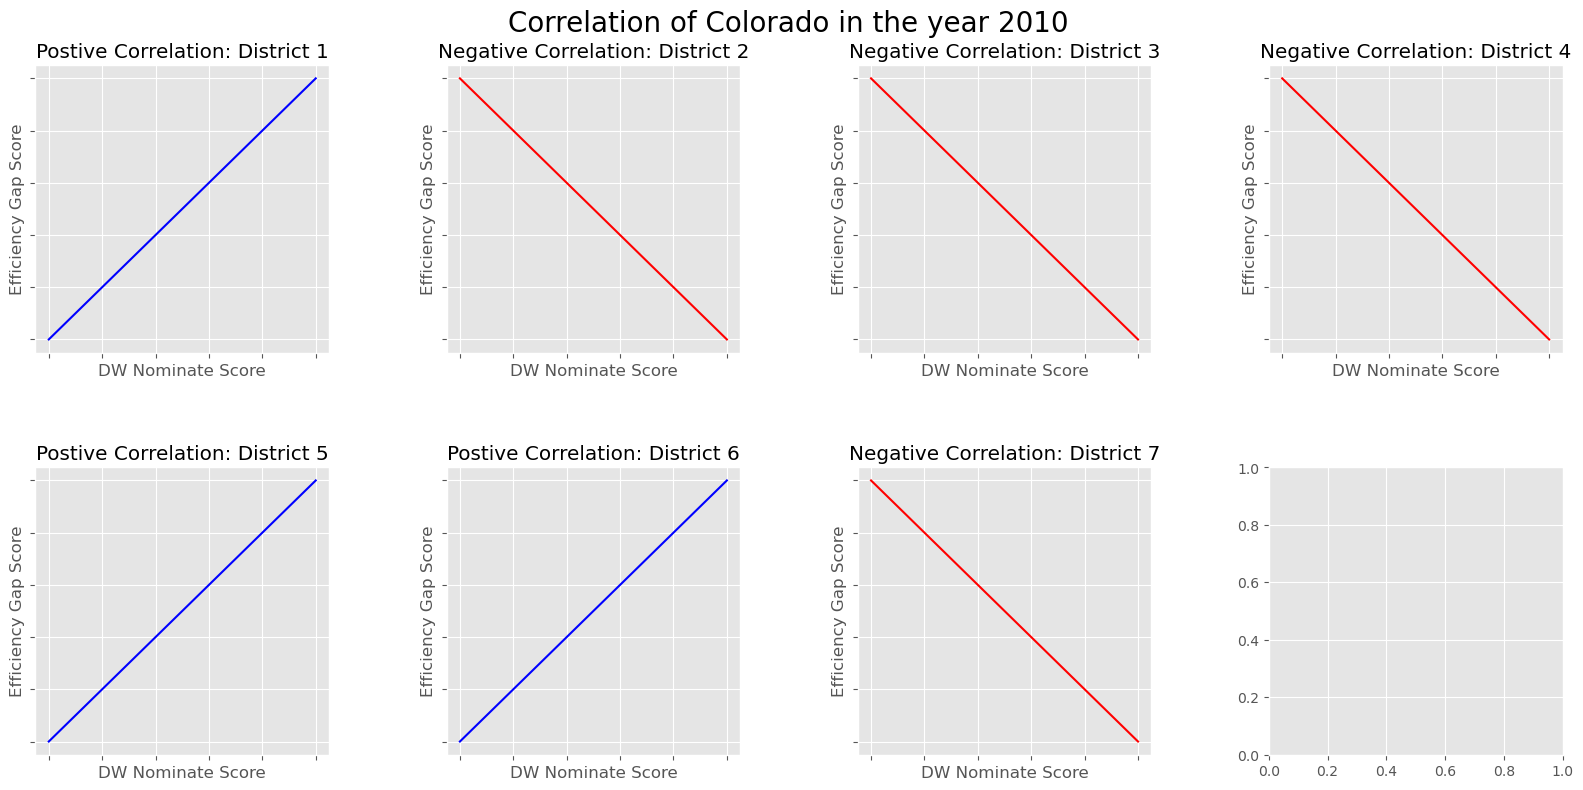

In [363]:
district(mega_df2, "CO", 2010)

In [433]:
state(mega_df2, "CA")

<built-in method index of list object at 0x7ff3bdef4940>


IndexError: list index out of range

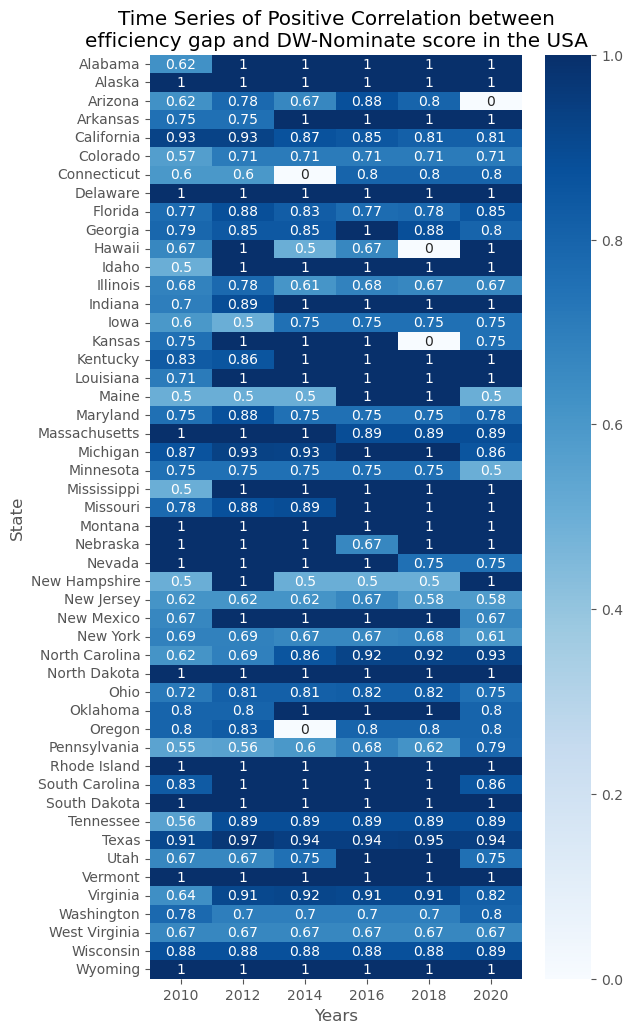

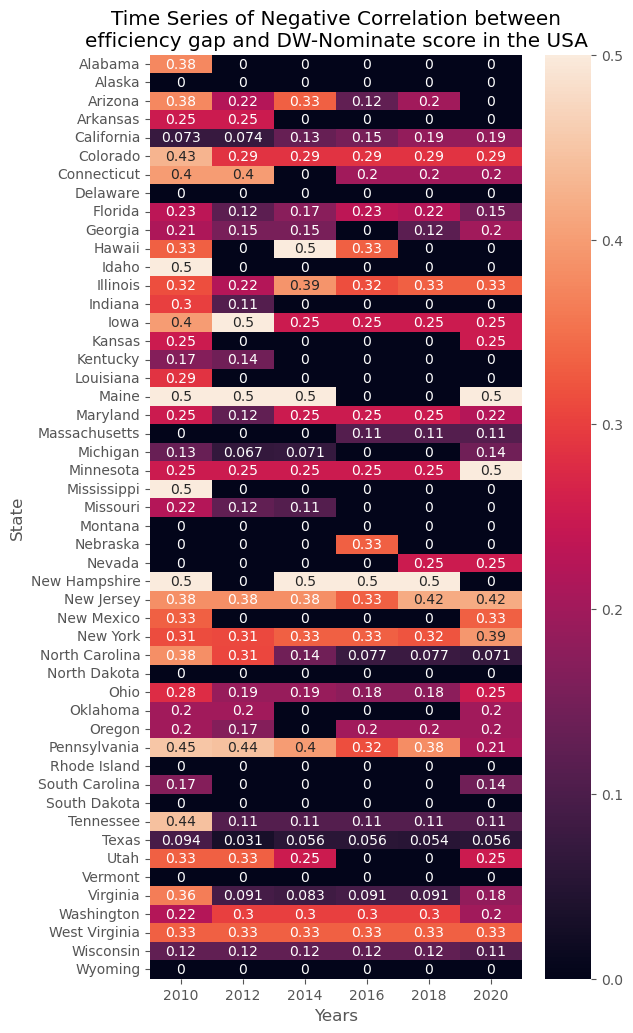

In [396]:
country(mega_df2)

Democratic  Republican   total  Majority  loser_wasted  \
District Year State                                                           
1.0      2010 AK          77606      175384  252990    126496         77606   
              AL              0      129063  129063     64532             0   
2.0      2010 AL         106865      111645  218510    109256        106865   
3.0      2010 AL          80204      117736  197940     98971         80204   
4.0      2010 AL              0      167714  167714     83858             0   
...                         ...         ...     ...       ...           ...   
8.0      2020 WI         149558      268173  417731    208866        149558   
1.0      2020 WV          81177      180488  261665    130833         81177   
2.0      2020 WV         100799      172195  272994    136498        100799   
3.0      2020 WV          64927      161585  226512    113257         64927   
1.0      2020 WY          66576      185732  252308    126155         66576   

                     winner_wasted  efficiency gap state  district  year  ...  \
District Year State                                                       ...   
1.0      2010 AK             48888        0.227027    AK       1.0  2010  ...   
              AL             64531        0.999985    AL       1.0  2010  ...   
2.0      2010 AL              2389        0.956250    AL       2.0  2010  ...   
3.0      2010 AL             18765        0.620778    AL       3.0  2010  ...   
4.0      2010 AL             83856        0.999976    AL       4.0  2010  ...   
...                            ...             ...   ...       ...   ...  ...   
8.0      2020 WI             59307        0.432100    WI       8.0  2020  ...   
1.0      2020 WV             49655        0.240933    WV       1.0  2020  ...   
2.0      2020 WV             35697        0.476945    WV       2.0  2020  ...   
3.0      2020 WV             48328        0.146560    WV       3.0  2020  ...   
1.0      2020 WY             59577        0.055479    WY       1.0  2020  ...   

                     efficiency gap state EG Thres: 0.08 DW Thres: 0.30  \
District Year State                                                       
1.0      2010 AK                 0.227027              1              0   
              AL                 0.076764              0              1   
2.0      2010 AL                 0.076764              0              0   
3.0      2010 AL                 0.076764              0              1   
4.0      2010 AL                 0.076764              0              1   
...                                   ...            ...            ...   
8.0      2020 WI                 0.267776              1              1   
1.0      2020 WV                 0.297495              1              0   
2.0      2020 WV                 0.297495              1              1   
3.0      2020 WV                 0.297495              1              1   
1.0      2020 WY                 0.055479              0              1   

                    EG Thres: 0.15  DW Thres: 0.40  EG Thres: 0.20  \
District Year State                                                  
1.0      2010 AK                 1               0               1   
              AL                 0               0               0   
2.0      2010 AL                 0               0               0   
3.0      2010 AL                 0               0               0   
4.0      2010 AL                 0               0               0   
...                            ...             ...             ...   
8.0      2020 WI                 1               1               1   
1.0      2020 WV                 1               0               1   
2.0      2020 WV                 1               1               1   
3.0      2020 WV                 1               1               1   
1.0      2020 WY                 0               1               0   

                     DW Thres: 0.50  corr1  corr2  c

# voting patterns over the years by state

In [355]:
def voting_patterns(df):

    state_info = pd.read_csv("../data/state_info.csv")
    state_dict = dict(zip(state_info.code, state_info.state))
    temp = df.replace({"state": state_dict})

    new_df = pd.DataFrame(columns = ["state", "year", "percentage", "type"])
    counter=0
    for state in temp.state.unique():
        temp2 = temp[(temp['state'] == state)] 
        for year in temp.year.unique():
            temp3 = temp2[(temp2['year'] == year)] 
            values1 = temp3['Democratic'].sum()/temp3['total'].sum()
            values2 = temp3['Republican'].sum()/temp3['total'].sum()
            new_df.loc[counter] = [state, year, values1, 'D']
            new_df.loc[counter+1] =  [state, year, values2, 'R']
            counter = counter+2
            

    dem = new_df[(new_df['type'] == 'D')]
    rep = new_df[(new_df['type'] == 'R')] 

    dem = dem.pivot("state", "year", "percentage")
    rep = rep.pivot("state", "year", "percentage")
    
    plt.figure(figsize=(6, 12))
    sns.heatmap(dem, annot=True,cmap="Blues")
    plt.title("Time Series of Democratic Voting Patterns in the USA")
    plt.xlabel("Years")
    plt.ylabel("State")
    plt.show()

    plt.figure(figsize=(6, 12))
    sns.heatmap(rep, annot=True)
    plt.title("Time Series of Republican Voting Patterns in the USA")
    plt.xlabel("Years")
    plt.ylabel("States")
    plt.show()

/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_27025/1660859647.py:13: RuntimeWarning: invalid value encountered in scalar divide
  values1 = temp3['Democratic'].sum()/temp3['total'].sum()
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_27025/1660859647.py:14: RuntimeWarning: invalid value encountered in scalar divide
  values2 = temp3['Republican'].sum()/temp3['total'].sum()
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_27025/1660859647.py:13: RuntimeWarning: invalid value encountered in scalar divide
  values1 = temp3['Democratic'].sum()/temp3['total'].sum()
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_27025/1660859647.py:14: RuntimeWarning: invalid value encountered in scalar divide
  values2 = temp3['Republican'].sum()/temp3['total'].sum()
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_27025/1660859647.py:13: RuntimeWarning: invalid value encountered in scalar divide
  values1 = temp3['Democratic'].sum()/temp3['total'].s

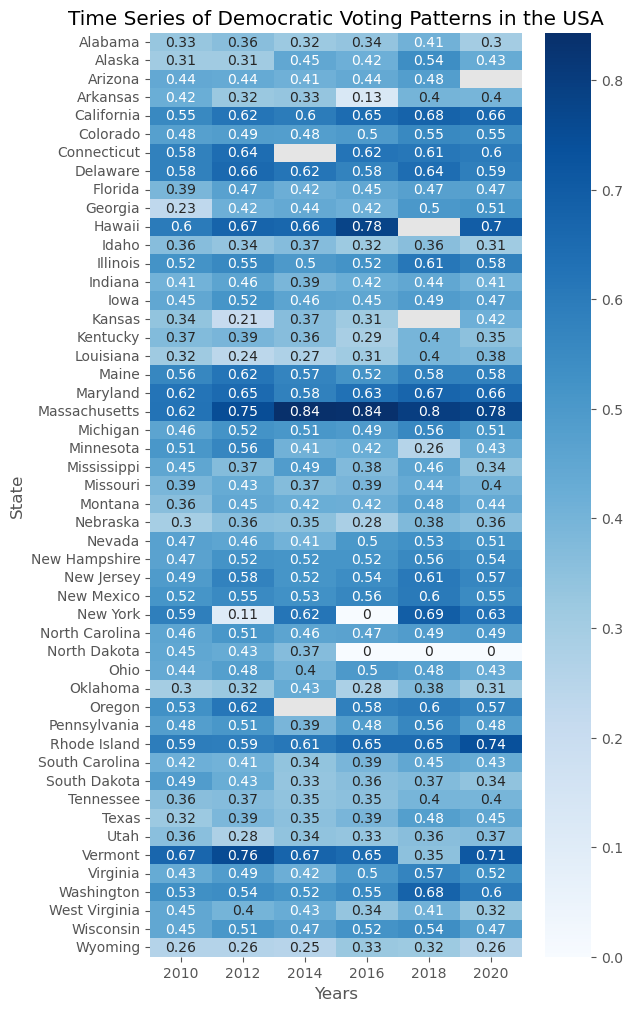

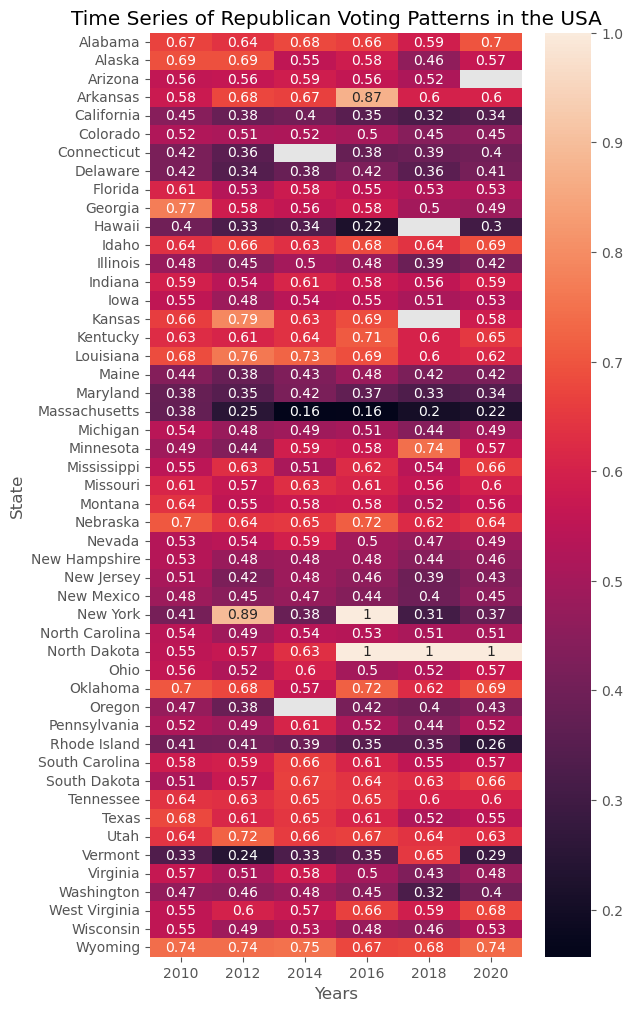

In [356]:
voting_patterns(mega_df2)

In [361]:
def nominate_scores(df):

    state_info = pd.read_csv("../data/state_info.csv")
    state_dict = dict(zip(state_info.code, state_info.state))
    temp = df.replace({"state": state_dict})

    new_df = pd.DataFrame(columns = ["state", "year", "score"])
    counter=0
    for state in temp.state.unique():
        temp2 = temp[(temp['state'] == state)] 
        for year in temp.year.unique():
            temp3 = temp2[(temp2['year'] == year)] 
            values1 = temp3['nominate_dim1'].mean()
            new_df.loc[counter] = [state, year, values1]
            counter = counter+1
            

    scores = new_df.pivot("state", "year", "score")
    
    plt.figure(figsize=(6, 12))
    sns.heatmap(scores, annot=True,cmap="Greens")
    plt.title("Time Series of Political Extremities\n (DW Nominate Scores) for the USA")
    plt.xlabel("Years")
    plt.ylabel("States")
    plt.show()

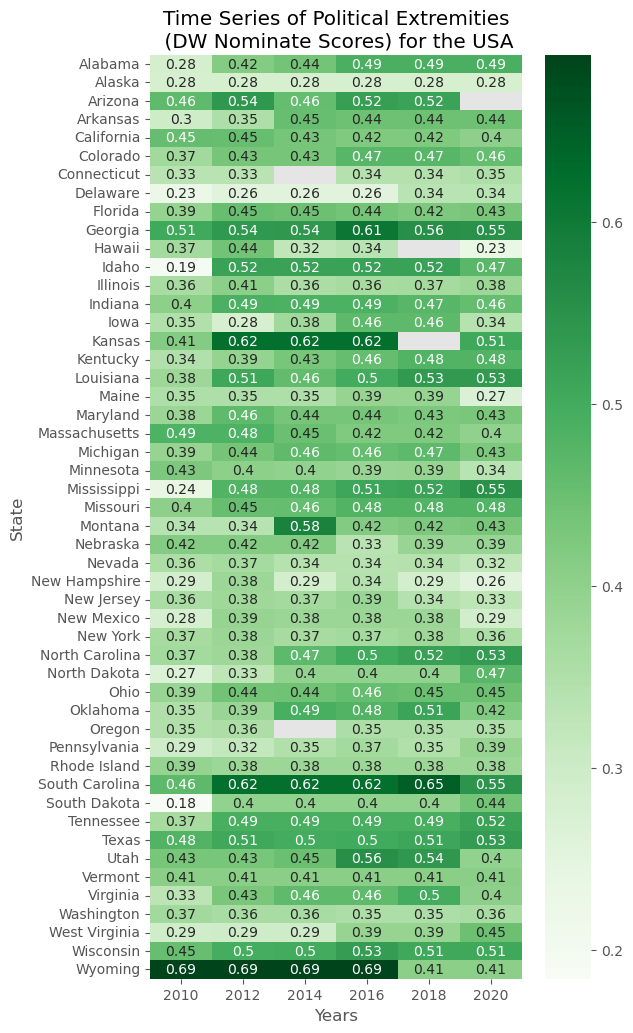

In [362]:
nominate_scores(mega_df2)

In [ ]:
# other plots?